In [1]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('default.samples', delim_whitespace=True, header=None, index_col=False)
data = df

X = data.iloc[:, 0:3].values

y = data.iloc[:, 3].values

 
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

 
# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
 
# # create DataLoader, then take one batch
# loader = DataLoader(list(zip(X,y)), shuffle=True, batch_size=64)
# for X_batch, y_batch in loader:
#     print(X_batch, y_batch)
#     break

class SonarDataset(Dataset):
    def __init__(self, X, y):
        # convert into PyTorch tensors and remember them
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
 
    def __len__(self):
        # this should return the size of the dataset
        return len(self.X)
 
    def __getitem__(self, idx):
        # this should return one sample from the dataset
        features = self.X[idx]
        target = self.y[idx]
        return features, target
    
    
# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 
# set up DataLoader for training set
loader = DataLoader(list(zip(X_train, y_train)), shuffle=True, batch_size=len(X_train))
     

# # set up DataLoader for data set
# dataset = SonarDataset(X, y)
# trainset, testset = random_split(dataset, [0.7, 0.3])
# loader = DataLoader(trainset, shuffle=True, batch_size= len(trainset))

# # Instantiate training and test data
# train_data = Data(X_train, y_train)
# train_dataloader = DataLoader(dataset=train_data, batch_size = 64, shuffle=True)

# test_data = Data(X_test, y_test)
# test_dataloader = DataLoader(dataset=test_data, batch_size=64, shuffle=True)


In [3]:
from torch import nn
from torch import optim


class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim1,hidden_dim2, hidden_dim3, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim1)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim1, hidden_dim2)
        nn.init.kaiming_uniform_(self.layer_2.weight, nonlinearity="relu")
        self.layer_3 = nn.Linear(hidden_dim2, hidden_dim3)
        nn.init.kaiming_uniform_(self.layer_3.weight, nonlinearity="relu")
        self.layer_4 = nn.Linear(hidden_dim3, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.relu(self.layer_2(x))
        x = torch.nn.functional.relu(self.layer_3(x))
        x = torch.nn.functional.sigmoid(self.layer_4(x))

        return x

input_dim = 3
hidden_dim1 = 3
hidden_dim2 =3
hidden_dim3 = 3
output_dim = 1
model = NeuralNetwork(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)
print(model)

n_epochs = 2000
loss_values = []
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
model.train()
for epoch in range(n_epochs):
    for X_values, y_values in loader:
        optimizer.zero_grad()
 
# forward + backward + optimize

        y_pred = model(X_values)
        loss = loss_fn(y_pred, y_)
        #print(len(loss_values))
        loss_values.append(loss.item())
        
        loss.backward()
        optimizer.step()

print("Training Complete")

model.eval()
y_pred = model(X_test)
acc = (y_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

NeuralNetwork(
  (layer_1): Linear(in_features=3, out_features=3, bias=True)
  (layer_2): Linear(in_features=3, out_features=3, bias=True)
  (layer_3): Linear(in_features=3, out_features=3, bias=True)
  (layer_4): Linear(in_features=3, out_features=1, bias=True)
)
Training Complete
Model accuracy: 85.94%


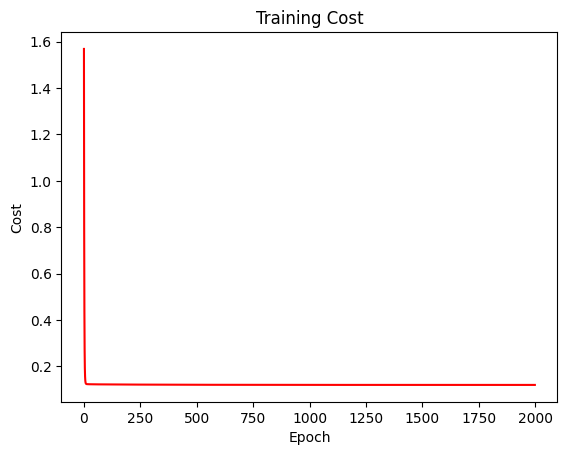

In [4]:
# step = np.linspace(0, 100, 7400)

# fig, ax = plt.subplots(figsize=(8,5))
# plt.plot(step, np.array(loss_values))
# plt.title("Step-wise Loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.show()

fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(n_epochs)], loss_values, 'red')
plt.show()